# Module 3.2 — Drawdown Is Structural, Not a Failure
### Background assumptions
- Outcome distributions are fixed
- Expectancy is unchanged across simulations
- No strategy logic or optimization is involved

Drawdowns are examined here not as mistakes, but as natural outcomes of variance.

#### Purpose of this simulation
To observe the depth and frequency of drawdowns that emerge naturally       
from repeated paths generated under identical conditions.

#### Common intuitive beliefs (to be examined)
- Large drawdowns indicate something is wrong
- “Good systems” should avoid deep drawdowns
- Drawdowns are exceptions rather than norms

### Objective
>To normalize drawdowns by observing their distribution across many independent equity paths.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

In [2]:
n_trades = 300
wins = 165
losses = n_trades - wins

outcomes = np.array([1]*wins + [-1]*losses)

In [3]:
def generate_equity_path(outcomes):
    shuffled = np.random.permutation(outcomes)
    return np.cumsum(shuffled)

def max_drawdown(equity):
    peak = equity[0]
    max_dd = 0
    for x in equity:
        if x > peak:
            peak = x
        dd = peak - x
        max_dd = max(max_dd, dd)
    return max_dd


In [4]:
n_paths = 1000

max_drawdowns = []

for _ in range(n_paths):
    path = generate_equity_path(outcomes)
    max_drawdowns.append(max_drawdown(path))

max_drawdowns = np.array(max_drawdowns)


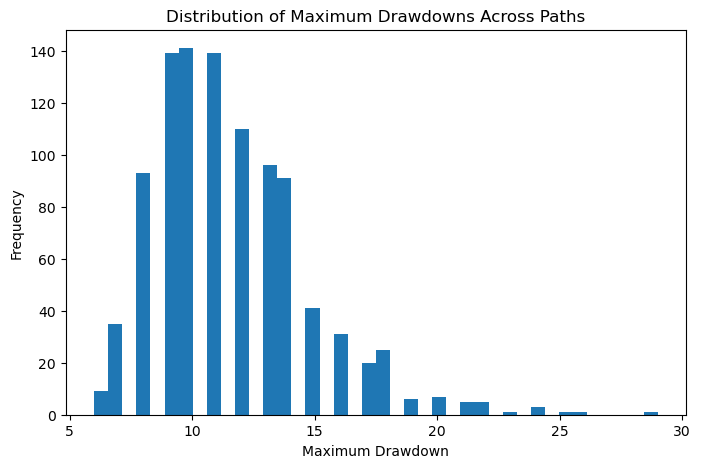

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(max_drawdowns, bins=40)
plt.title("Distribution of Maximum Drawdowns Across Paths")
plt.xlabel("Maximum Drawdown")
plt.ylabel("Frequency")
plt.show()


In [6]:
thresholds = [10, 15, 20, 25]

for t in thresholds:
    pct = (max_drawdowns >= t).mean() * 100
    print(f"Drawdown ≥ {t}: {pct:.1f}% of paths")


Drawdown ≥ 10: 72.4% of paths
Drawdown ≥ 15: 14.7% of paths
Drawdown ≥ 20: 2.4% of paths
Drawdown ≥ 25: 0.3% of paths


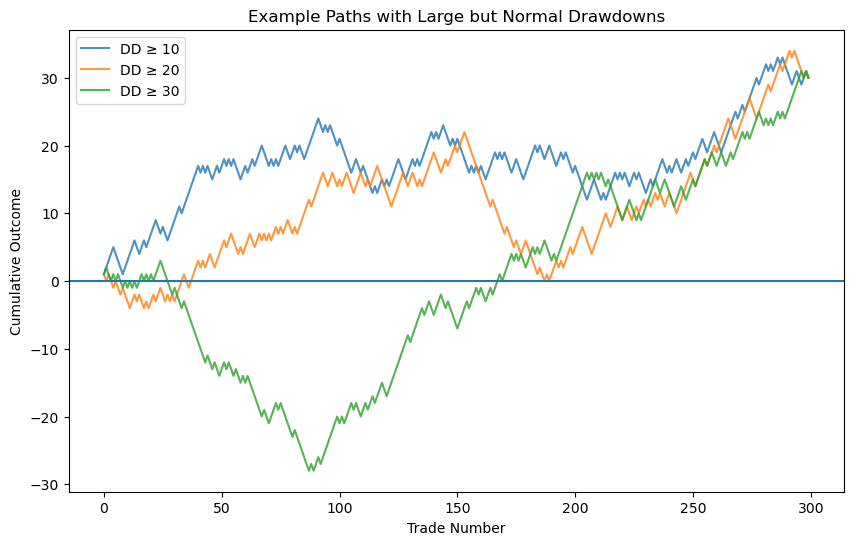

In [7]:
plt.figure(figsize=(10, 6))

for dd_target in [10, 20, 30]:
    while True:
        path = generate_equity_path(outcomes)
        if max_drawdown(path) >= dd_target:
            plt.plot(path, alpha=0.8, label=f"DD ≥ {dd_target}")
            break

plt.axhline(0)
plt.title("Example Paths with Large but Normal Drawdowns")
plt.xlabel("Trade Number")
plt.ylabel("Cumulative Outcome")
plt.legend()
plt.show()


# Observations

- Large drawdowns appear frequently
- The distribution is wide, not tight
- Many paths experience drawdowns that feel extreme

#### Yet:
- No rules changed
- No probabilities changed
- No system degradation occurred

#### Key insight
> Drawdowns are not signals.     
They are structural consequences of variance.

#### Reframe
- A drawdown does not imply error
- A drawdown does not require explanation
- A drawdown does not mean conditions are “bad”

It only means:
>Participation is ongoing.